In [47]:
import time

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

线性回归

[225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]
[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


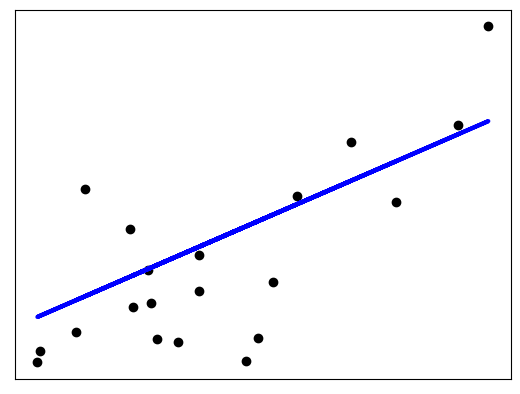

In [48]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# 加载数据集
X, y = datasets.load_diabetes(return_X_y=True)
# 只用一个维度的数据，便于画图
X = X[:, np.newaxis, 2]
# 归一化操作
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X[:-20])
X_test = scaler.transform(X[-20:])
y_train = y[:-20]
y_test = y[-20:]

# 线性模型拟合
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
# 预测结果
y_pred = linear_reg.predict(X_test)
print(y_pred)
print(y_test)

plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


支持向量机SVM-分类

- SVC-用于分类，用libsvm实现
- 参数如下:
  - C : 惩罚项，默认为1.0，C越大容错空间越小；C越小，容错空间越大
  - kernel : 核函数的类型，可选参数为:
    - linear : 线性核函数
    - poly : 多项式核函数
    - rbf : 高斯核函数
    - sigmod : sigmod核函数
    - precomputed : 核矩阵，表示自己提前计算好核函数矩阵
  - degree : 多项式核函数的阶，默认为3，只对多项式核函数生效，其他的自动忽略
  - gamma : 核函数系数，可选，float类型，默认为auto。只对'rbf' ,'poly' ,'sigmod'有效。如果gamma为auto，代表其值为样本特征数的倒数，即1/n_features（不是很懂）
  - coef0 :核函数中的独立项，float类型，可选，默认为0.0。只有对'poly' 和,'sigmod'核函数有用，是指其中的参数c
  - probability : probability:是否启用概率估计，bool类型，可选参数，默认为False，这必须在调用fit()之前启用，并且会fit()方法速度变慢（也不是很懂）
  - tol : svm停止训练的误差精度，float类型，可选参数，默认为1e^-3
  - cache_size : 内存大小，float，可选，默认200。指定训练所需要的内存，单位MB
  - class_weight : 类别权重，dict类型或str类型，可选，默认None。给每个类别分别设置不同的惩罚参数C，如果没有，则会给所有类别都给C=1，即前面指出的C。如果给定参数'balance'，则使用y的值自动调整与输入数据中的类频率成反比的权重（似乎跟多分类有关）
  - max_iter:最大迭代次数，int类型，默认为-1，不限制
  - decision_function_shape :决策函数类型，可选参数'ovo'和'ovr'，默认为'ovr'。'ovo'表示one vs one，'ovr'表示one vs rest。（多分类）
  - random_state :数据洗牌时的种子值，int类型，可选，默认为None
- 模型训练结束后，可以使用下列参数:
    - support_ : array类型，支持向量的索引
    - support_vectors_: 支持向量的集合
    - n_support_ : 比如SVC将数据集分成了4类，该属性表示了每一类的支持向量的个数。
    - dual_coef_ : array, shape = [n_class-1, n_SV] 对偶系数，支持向量在决策函数中的系数，在多分类问题中，这个会有所不同。
    - coef_ : array，该参数仅在线性核时才有效，指的是每一个属性被分配的权值。
    - intercept_ :array, shape = [n_class * (n_class-1) / 2]决策函数中的常数项bias。和coef_共同构成决策函数的参数值

- LinearSVC（Linear Support Vector Classification）线性支持向量机，核函数是 linear，不是基于libsvm实现的
- 参数：
  - C：目标函数的惩罚系数C，默认C = 1.0；
  - loss：指定损失函数. squared_hinge(默认), squared_hinge
  - penalty ： 惩罚方式，str类型，l1, l2
  - dual ：选择算法来解决对偶或原始优化问题。当nsamples>nfeatures时dual=false
  - tol ：svm结束标准的精度， 默认是 1e - 3
  - multi_class：如果y输出类别包含多类，用来确定多类策略， ovr表示一对多，“crammer_singer”优化所有类别的一个共同的目标 。如果选择“crammer_singer”，损失、惩罚和优化将会被被忽略。
  - max_iter : 要运行的最大迭代次数。int，默认1000

In [49]:
from sklearn.svm import LinearSVC, SVC

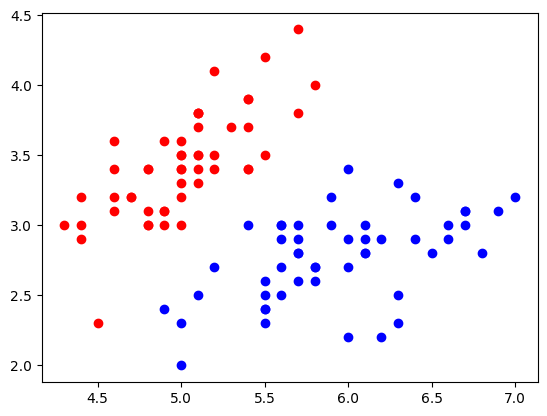

In [50]:

# 使用鸢尾花数据的前两列，方便画图
iris = datasets.load_iris()

X = iris.data
y = iris.target
# 只取前两列
X = X[y < 2, :2]
# 只取前两类
y = y[y < 2]
# 所有0类的点，用红色
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red")
# 所有1类的点，用蓝色
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue")

# 对X进行归一化处理

scaler = StandardScaler()
scaler.fit(X)
X_stand = scaler.transform(X)


In [52]:
# linear_svc = LinearSVC(C=1e9)
linear_svc = LinearSVC(C=1e9, dual=False)
linear_svc.fit(X_stand, y)

# w，所有 x 的权值
print(linear_svc.coef_)
# b，截距
print(linear_svc.intercept_)

[[ 4.03251658 -2.50704823]]
[0.92736842]


画出决策边界

- meshgrid() 返回了有两个向量定义的方形空间中的所有点的集合。x0是x值，x1是y的值
- ravel() 将向量拉成一行
- c_[] 将向量排列在一起
- contourf() 等高线

In [57]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),# 600个，影响列数
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),# 600个，影响行数
    )
    # x0 和 x1 被拉成一列，然后拼接成360000行2列的矩阵，表示所有点
    X_new = np.c_[x0.ravel(), x1.ravel()]    # 变成 600 * 600行， 2列的矩阵

    y_predict = model.predict(X_new)   # 二维点集才可以用来预测
    zz = y_predict.reshape(x0.shape)   # (600, 600)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)


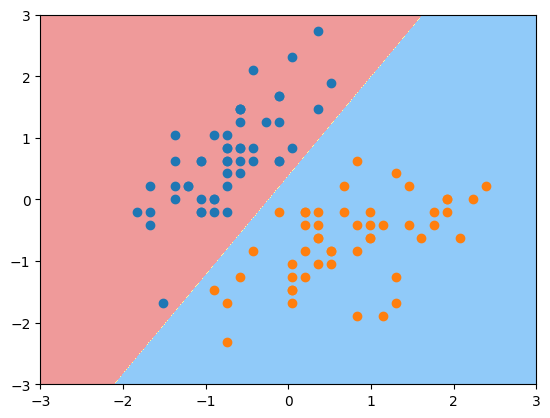

In [58]:
plot_decision_boundary(linear_svc, axis=[-3, 3, -3, 3])
plt.scatter(X_stand[y==0,0], X_stand[y==0,1])
plt.scatter(X_stand[y==1,0], X_stand[y==1,1])
plt.show()

添加上下边界

In [59]:
def plot_svc_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),# 600个，影响列数
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),# 600个，影响行数
    )
    # x0 和 x1 被拉成一列，然后拼接成360000行2列的矩阵，表示所有点
    X_new = np.c_[x0.ravel(), x1.ravel()]    # 变成 600 * 600行， 2列的矩阵

    y_predict = model.predict(X_new)   # 二维点集才可以用来预测
    zz = y_predict.reshape(x0.shape)   # (600, 600)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)

    w = model.coef_[0]
    b = model.intercept_[0]

    index_x = np.linspace(axis[0], axis[1], 100)
    y_up = (1-w[0]*index_x - b) / w[1]
    y_down = (-1-w[0]*index_x - b) / w[1]

    x_index_up = index_x[(y_up<=axis[3])  & (y_up>=axis[2])]
    x_index_down = index_x[(y_down<=axis[3]) & (y_down>=axis[2])]

    y_up = y_up[(y_up<=axis[3])  & (y_up>=axis[2])]
    y_down = y_down[(y_down<=axis[3]) & (y_down>=axis[2])]

    plt.plot(x_index_up, y_up, color="black")
    plt.plot(x_index_down, y_down, color="black")

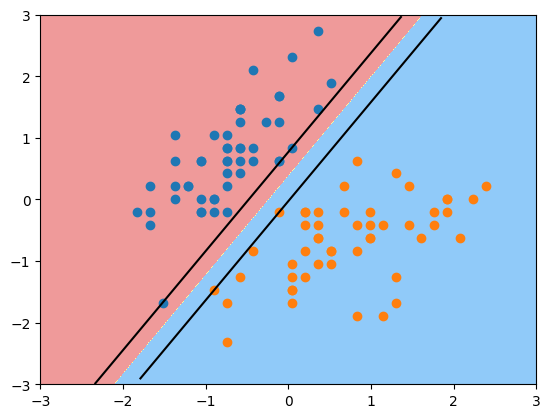

In [60]:
plot_svc_decision_boundary(linear_svc, axis=[-3, 3, -3, 3])
plt.scatter(X_stand[y==0,0], X_stand[y==0,1])
plt.scatter(X_stand[y==1,0], X_stand[y==1,1])
plt.show()

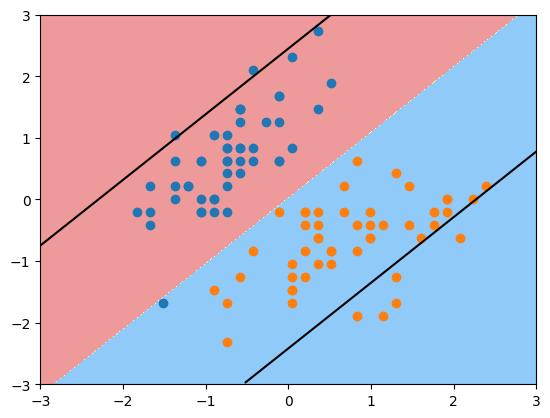

In [61]:
# C越小，容错空间越大上下边界应该更远
linear_svc = LinearSVC(C=0.01)
linear_svc.fit(X_stand, y)
plot_svc_decision_boundary(linear_svc, axis=[-3, 3, -3, 3])
plt.scatter(X_stand[y==0,0], X_stand[y==0,1])
plt.scatter(X_stand[y==1,0], X_stand[y==1,1])
plt.show()

多项式核函数

- 用LinearSVC，需要用PolynomialFeatures升维
- 用SVC() 指定kernel=poly

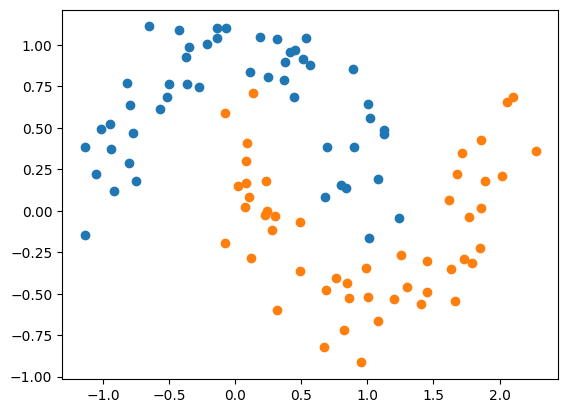

In [62]:
moons = datasets.make_moons(noise=0.15)
X = moons[0]
y = moons[1]

plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])

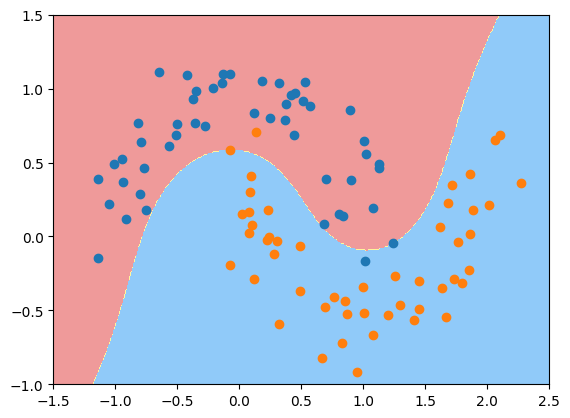

In [63]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 使用Pipeline的一条龙服务
def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    ])

poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)
poly_svc.predict(X)

plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

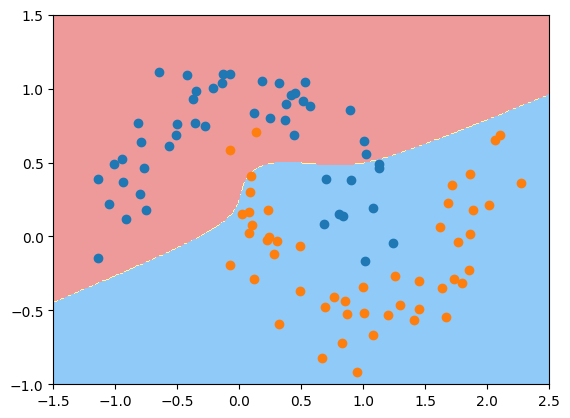

In [64]:
def PolynomialSVC(degree, C=1):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linearSVC", SVC(kernel="poly", C=C))
    ])

poly_svc2 = PolynomialSVC(3)
poly_svc2.fit(X,y)

plot_decision_boundary(poly_svc2, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

高斯核函数

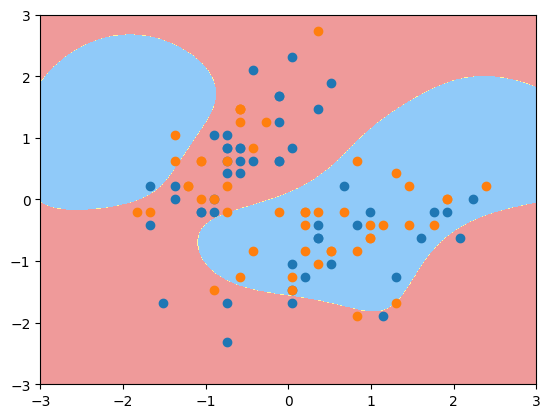

In [65]:
def SVC_(kernel="rbf", gamma=1):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linearSVC", SVC(kernel="rbf", gamma=gamma))
    ])

svc = SVC_(kernel="rbf", gamma=0.7)
svc.fit(X_stand, y)

plot_decision_boundary(svc, [-3,3,-3,3])
plt.scatter(X_stand[y==0,0], X_stand[y==0,1])
plt.scatter(X_stand[y==1,0], X_stand[y==1,1])

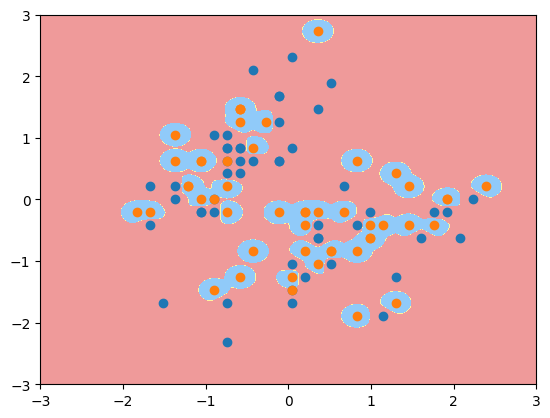

In [66]:
# gamma参数越大，高斯分布越窄
svc = SVC_(kernel="rbf", gamma=100)
svc.fit(X_stand, y)

plot_decision_boundary(svc, [-3,3,-3,3])
plt.scatter(X_stand[y==0,0], X_stand[y==0,1])
plt.scatter(X_stand[y==1,0], X_stand[y==1,1])

SVM 用在回归

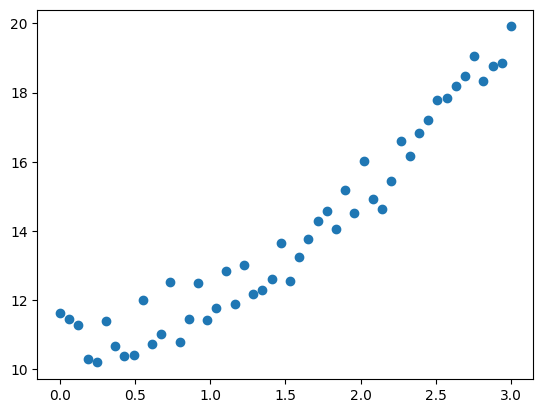

In [67]:
x = np.linspace(0, 3, 50)
y = x * x + 10 + np.random.uniform(0,2,50)
x = x.reshape(-1,1)
plt.scatter(x,y)

In [68]:
from sklearn.svm import SVR
linear_svr = SVR(kernel="linear")
poly_svr = SVR(kernel="poly", degree=4)
rbf_svr = SVR(kernel="rbf")

linear_svr.fit(x,y)
poly_svr.fit(x,y)
rbf_svr.fit(x,y)

print(linear_svr.coef_, linear_svr.intercept_)

[[3.18367347]] [9.12003556]


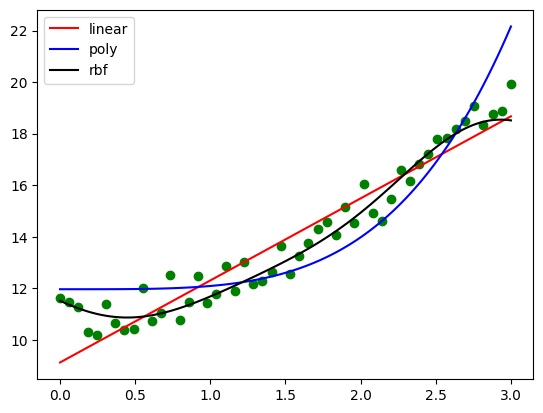

In [69]:
x_test = np.linspace(0,3,100).reshape(-1,1)
plt.scatter(x,y, color="green")
plt.plot(x_test, linear_svr.predict(x_test), color="red", label="linear")
plt.plot(x_test, poly_svr.predict(x_test), color="blue", label="poly")
plt.plot(x_test, rbf_svr.predict(x_test), color="black", label="rbf")
plt.legend()

逻辑回归-分类

- 参数
  - penalty:正则化选择参数，参数可选值为 l1 和 l2，分别对应 l1 正则化和 l2 正则化，默认是 l2 正则化。
    - 调整该参数的目的主要是为了防止过拟合，一般 penalty 选择 l2 正则化就够啦，但是如果选择 l2 正则化发现依然过拟合，即预测效果还是很差的时候，就可以考虑 l1 正则化。如果模型的特征非常多，我们希望做一些特征选择（即把一些不重要的特征过滤掉），这个时候也可以考虑用 l1 正则化。
    - penalty 参数的选择会影响我们损失函数优化算法的选择，即参数 solver 的选择，如果是 l2 正则化，可选的优化算法 {'newton-cg', 'lbfgs', 'liblinear', 'sag'}都可以选择。但是如果 penalty 是 L1 正则化的话，就只能选择'liblinear'了。这是因为 L1 正则化的损失函数不是连续可导的，而{'newton-cg', 'lbfgs','sag'}这三种优化算法时都需要损失函数的一阶或者二阶连续导数。而'liblinear'并没有这个依赖。这几个优化方法在 solver 参数环节进行讲述。
  - dual:用来指明是否将原问题改成他的对偶问题，对偶问题可以理解成相反问题，比如原问题是求解最大值的线性规划，那么他的对偶问题就是转化为求解最小值的线性规划，适用于样本较小的数据集，因样本小时，计算复杂度较低。
  - tol:残差收敛条件，默认是 0.0001，也就是只需要收敛的时候两步只差＜ 0.0001 就停止，可以设置更大或更小。(逻辑回归模型的损失函数是残差平方和)
  - C:正则化系数，正则化强度的导数，必须是一个正数，值越小，正则化强度越大，即防止过拟合的程度更大。
  - fit_intercept:是否将截距/方差加入到决策模型中，默认为 True。
  - class_weight:class_weight 是很重要的一个参数，是用来调节正负样本比例的，默认是值为 None，也就是正负样本的权重是一样的，你可以以 dict 的形式给模型传入任意你认为合适的权重比，也可以直接指定一个值“balanced”，模型会根据正负样本的绝对数量比来设定模型最后结果的权重比。比如，有一数据集的正负样本绝对数量比为 4:6,如果你给参数 class_weight 赋予 balanced 值，那么最后模型结果中，正负样本的权重比就会变成 6:4。
  - random_state:随机种子的设置，默认是 None,如果设置了随机种子，那么每次使用的训练集和测试集都是一样的，这样不管你运行多少次，最后的准确率都是一样的；如果没有设置，那么每次都是不同的训练集和测试集，最后得出的准确率也是不一样的。
  - solver:用来指明损失函数的优化方法，默认是'liblinear'方法，sklearn 自带了如下几种
    - 参数值优化方法 liblinear 使用了坐标轴下降法来迭代优化损失函数 lbfgs 拟牛顿法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数 newton-cg 也是牛顿法法的一种，利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数 sag 即随机平均梯度下降，是梯度下降法的变种，是一种线性收敛算法，和普通梯度下降法的区别是每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候
    - newton-cg, lbfgs 和 sag 这三种优化算法时都需要损失函数的一阶或者二阶连续导数，因此不能用于没有连续导数的 L1 正则化，只能用于 L2 正则化。而 liblinear 对 L1 正则化和 L2 正则化都适用。同时，因 sag 每次仅仅使用了部分样本进行梯度迭代，所以当数据量较少时不宜选用，而当数据量很大时，为了速度，sag 是第一选择。
  - max_iter:算法收敛的最大迭代次数，即求取损失函数最小值的迭代次数，默认是 100
  - multi_class:分类方法参数选择，'ovr'和'multinomial'两个值可以选择，默认值为'ovr'，如果分类问题是二分类问题，那么这两个参数的效果是一样的，主要体现在多分类问题上。
    - 对于多分类问题，"ovr"分类方法是:针对每一类别进行判断时，都会把这个分类问题简化为是/非两类问题；而'multinomial'是从众多类别中选出两个类别，对这两个类别进行判断，待判断完成后，再从剩下的类别中再选出两类进行判断，直至最后判断完成。
  - verbose:英文意思是”冗余“，就是会输出一些模型运算过程中的东西（任务进程），默认是 False，也就是不需要输出一些不重要的计算过程。
  - warm_start:是否使用上次的模型结果作为初始化，默认是 False，表示不使用。
  - n_jobs:并行运算数量(核的数量)，默认为 1，如果设置为-1，则表示将电脑的 cpu 全部用上。


[68]


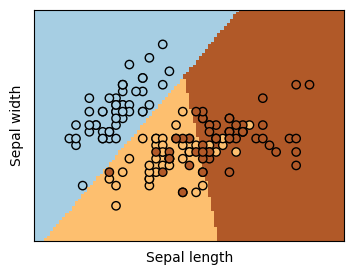

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay


iris = datasets.load_iris()
# 取前两个特征，便于画图
X = iris.data[:, :2]
Y = iris.target


logistic_reg = LogisticRegression(C=1e5)
logistic_reg.fit(X, Y)

# 模型迭代次数
print(logistic_reg.n_iter_)
# 返回决策函数值（比如svm中的决策距离）
# print(logistic_reg.decision_function(X))
# # 返回每个类别的概率值（有几类就返回几列值）
# print(logistic_reg.predict_proba(X))
# # 返回概率值的log值（即将概率取对数）
# print(logistic_reg.predict_log_proba(X))

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logistic_reg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()

sklearn 官方预测mnist数据集的例子:https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html

In [71]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

Sparsity with L1 penalty: 79.82%
Test score with L1 penalty: 0.8295


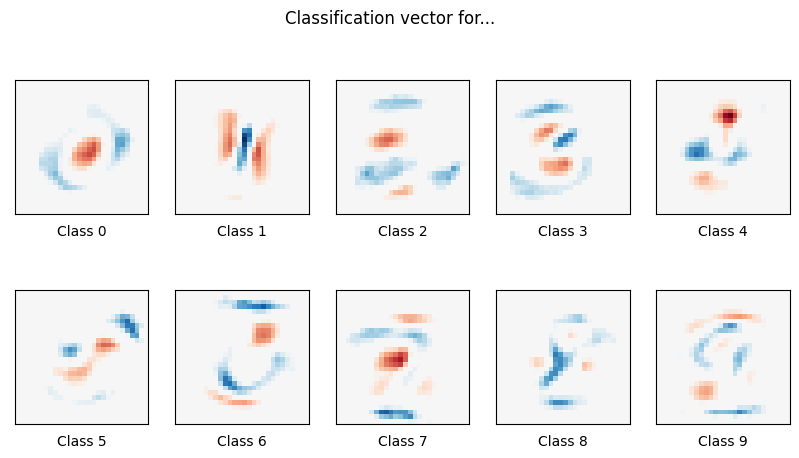

In [73]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")
plt.show()

决策树-分类

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
iris = datasets.load_iris()

x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2)

# 训练模型
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

# 预测
y_pred = clf.predict(x_test)
print(y_pred)


[0 2 0 2 1 0 1 1 0 1 2 1 1 2 0 1 0 2 1 1 2 0 2 2 2 1 2 2 0 1]


可视化

需要安装GraphViz：https://www.graphviz.org/

In [77]:
import pydotplus
from io import StringIO
from sklearn.tree import export_graphviz

In [78]:
feature_names=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']
target_names=['Iris Setosa','Iris Versicolour','Iris Virginica']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,feature_names=feature_names,
                     class_names=target_names,filled=True,rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')

True

![决策树结果](iris.png)

PCA主成分分析-降维

In [79]:
from sklearn.decomposition import PCA, KernelPCA

In [80]:
X, y = datasets.fetch_openml(data_id=41082, as_frame=False, return_X_y=True)
X = MinMaxScaler().fit_transform(X)
print(X.shape)

(9298, 256)


In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1_000, test_size=100
)

rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
X_test_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
X_train_noisy = X_train + noise

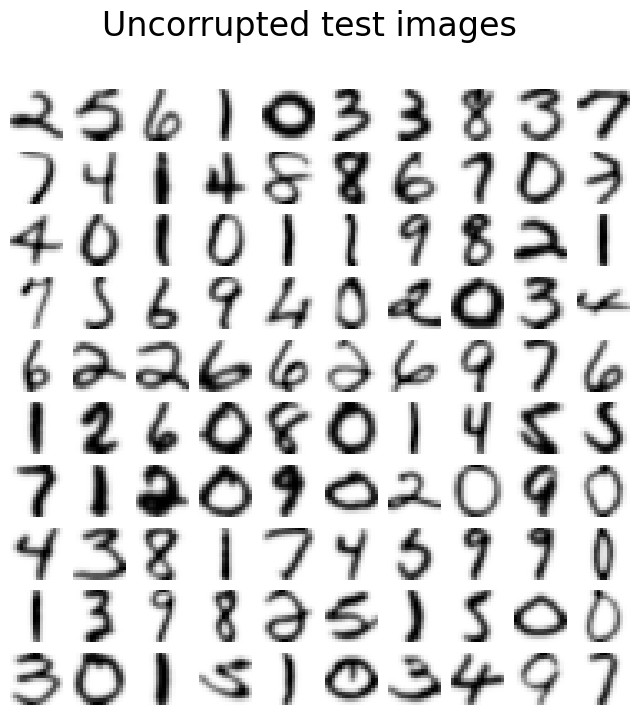

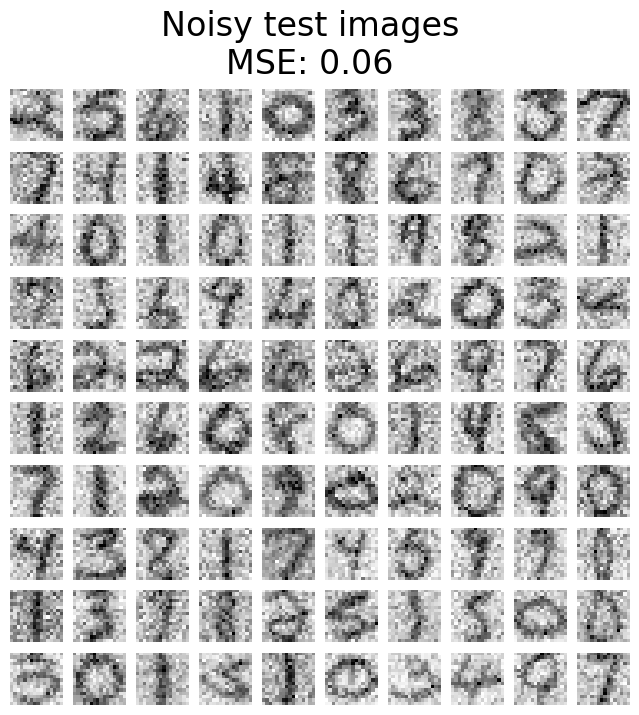

In [82]:
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(X_test, "Uncorrupted test images")
plot_digits(
    X_test_noisy, f"Noisy test images\nMSE: {np.mean((X_test - X_test_noisy) ** 2):.2f}"
)

In [83]:
# n_components是我们降维后需要的维度
pca = PCA(n_components=32)
kernel_pca = KernelPCA(
    n_components=400, kernel="rbf", gamma=1e-3, fit_inverse_transform=True, alpha=5e-3
)

pca.fit(X_train_noisy)
kernel_pca.fit(X_train_noisy)
# inverse_transform 将降维后的数据转换成原始数据，但可能不会完全一样
# transform 将数据X转换成降维后的数据。当模型训练好后，对于新输入的数据，都可以用transform方法来降维。
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

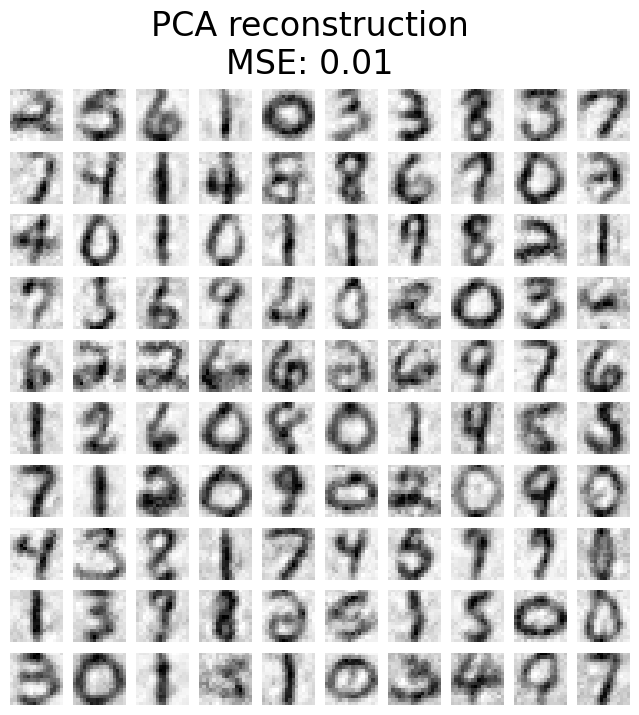

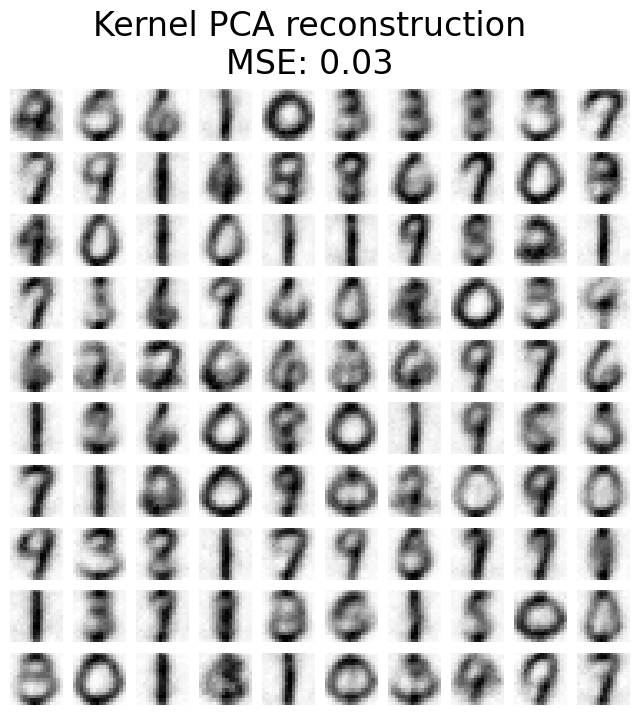

In [84]:
plot_digits(
    X_reconstructed_pca,
    f"PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_pca) ** 2):.2f}",
)
plot_digits(
    X_reconstructed_kernel_pca,
    f"Kernel PCA reconstruction\nMSE: {np.mean((X_test - X_reconstructed_kernel_pca) ** 2):.2f}",
)

K-Means-聚类算法

In [85]:
from sklearn.cluster import kmeans_plusplus, KMeans

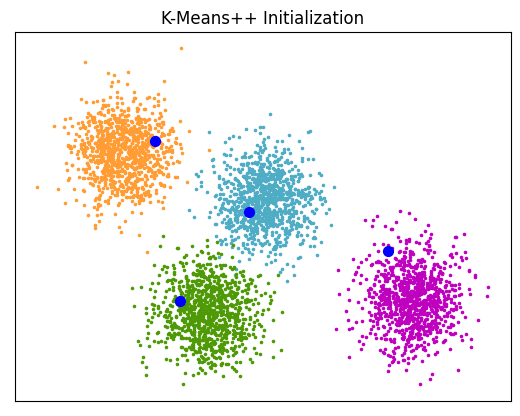

In [86]:
n_samples = 4000
n_components = 4
X, y_true = datasets.make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)
X = X[:, ::-1]

centers_init, indices = kmeans_plusplus(X, n_clusters=4, random_state=0)

plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

kmeans 官方示例
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py

# digits: 10; # samples: 1797; # features 64


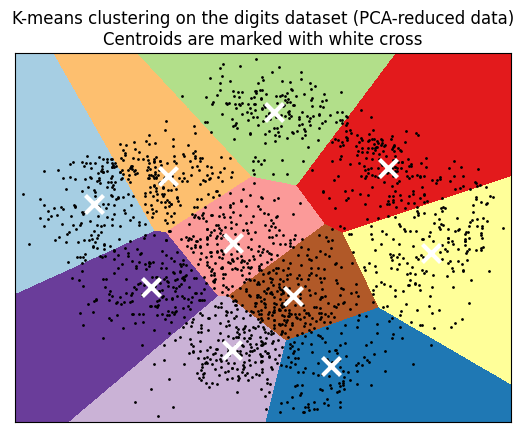

In [87]:
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

data, labels = datasets.load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size
print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()